In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastbook
from fastbook import *
import numpy as np
fastbook.setup_book()
import os
import ipywidgets

In [2]:
path=untar_data(URLs.MNIST)
Path.BASE_PATH=path

In [3]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [4]:
(path/'training').ls()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [5]:
images=get_image_files(path/'training')
images

(#60000) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...]

In [6]:
img=Image.open(path/'training'/'0'/'1.png')
img.to_thumb(128,128)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


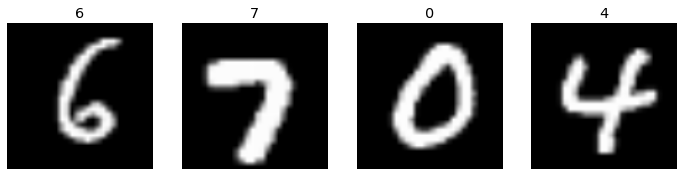

In [7]:
number_pred=DataBlock(blocks=(ImageBlock,CategoryBlock),
                     get_items=get_image_files,
                     splitter=RandomSplitter(valid_pct=0.2,seed=42),
                     get_y=parent_label,
                     item_tfms=Resize(128))
dls=number_pred.dataloaders(path/'training')
dls.valid.show_batch(max_n=4,nrows=1)

In [8]:
number_pred=cnn_learner(dls,resnet34,metrics=error_rate)
# lr_min,lr_steep=number_pred.lr_find()
number_pred.fine_tune(1,base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,1.459527,0.793854,0.022583,40:08


epoch,train_loss,valid_loss,error_rate,time
0,0.082131,0.042047,0.009833,47:49


In [12]:
number_pred.export(fname='Number Predictor.pkl')
path=Path()
path.ls(file_exts='.pkl')

(#4) [Path('Cars_Predictor.pkl'),Path('MultiCat Predictor.pkl'),Path('Number Predictor.pkl'),Path('shoes_model.pkl')]

In [16]:
number_predict=load_learner(path/'Number Predictor.pkl')
number_predict.predict('E:/Coding/Github/FastAI/Mnist_number/1(1).png')

('1',
 TensorBase(1),
 TensorBase([4.9801e-14, 1.0000e+00, 3.1423e-08, 1.1435e-13, 2.5925e-09, 1.8258e-10, 2.8895e-15, 8.7156e-08, 6.3707e-12, 3.6421e-10]))

In [17]:
dls